In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\Mohammed Yasser\Downloads\Compressed\archive\Titanic-Dataset.csv")

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.isnull().sum()*100/len(data)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
data.drop(columns=["Cabin"], inplace=True)

In [9]:
numerical_colimns = data.select_dtypes(np.number).columns.to_list()
numerical_colimns

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

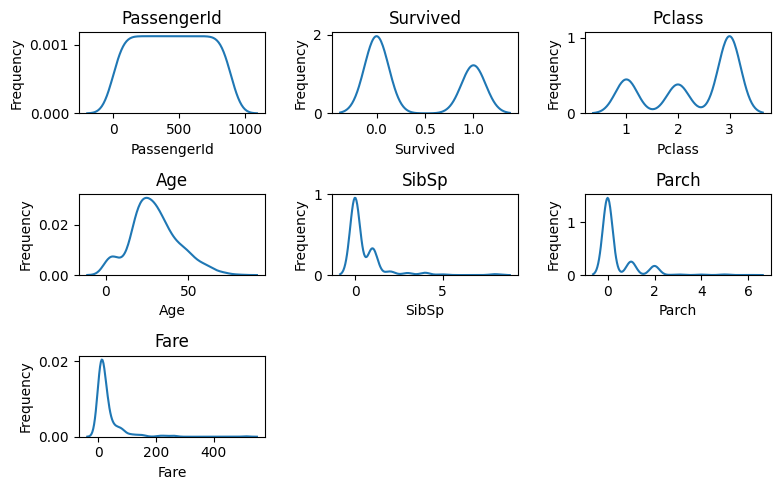

In [10]:
plt.figure(figsize=(8, 5))
for col in numerical_colimns:
    plt.subplot(3, 3, numerical_colimns.index(col)+1 )
    sns.kdeplot(data[col])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
plt.show()

In [11]:
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])


In [12]:
outliers_col = ["Fare", "SibSp", "Age"]

In [13]:
Q1 = data[outliers_col].quantile(0.25)
Q3 = data[outliers_col].quantile(0.75)
IQR = Q3-Q1
outliers = ((data[outliers_col] < Q1 - 1.5*IQR) | (data[outliers_col] > Q3 + 1.5*IQR)).any(axis=1)

In [14]:
outliers.sum()*100/len(data)

np.float64(22.334455667789)

In [15]:
for col in outliers_col:
    data[col] = np.where(outliers , data[col].median(), data[col])

In [16]:
data.duplicated().sum()

np.int64(0)

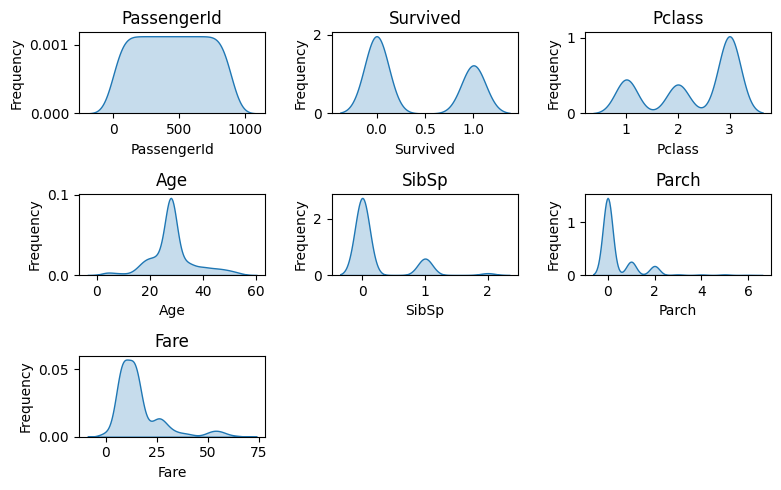

In [17]:
plt.figure(figsize=(8, 5))
for col in numerical_colimns:
    plt.subplot(3, 3, numerical_colimns.index(col)+1 )
    sns.kdeplot(data[col], fill= True)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
plt.show()

In [18]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.562290,0.213244,0.381594,16.306030
std,257.353842,0.486592,0.836071,8.426303,0.456518,0.806057,11.881677
min,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,26.000000,0.000000,0.000000,7.925000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,30.000000,0.000000,0.000000,16.100000
max,891.000000,1.000000,3.000000,54.000000,2.000000,6.000000,65.000000


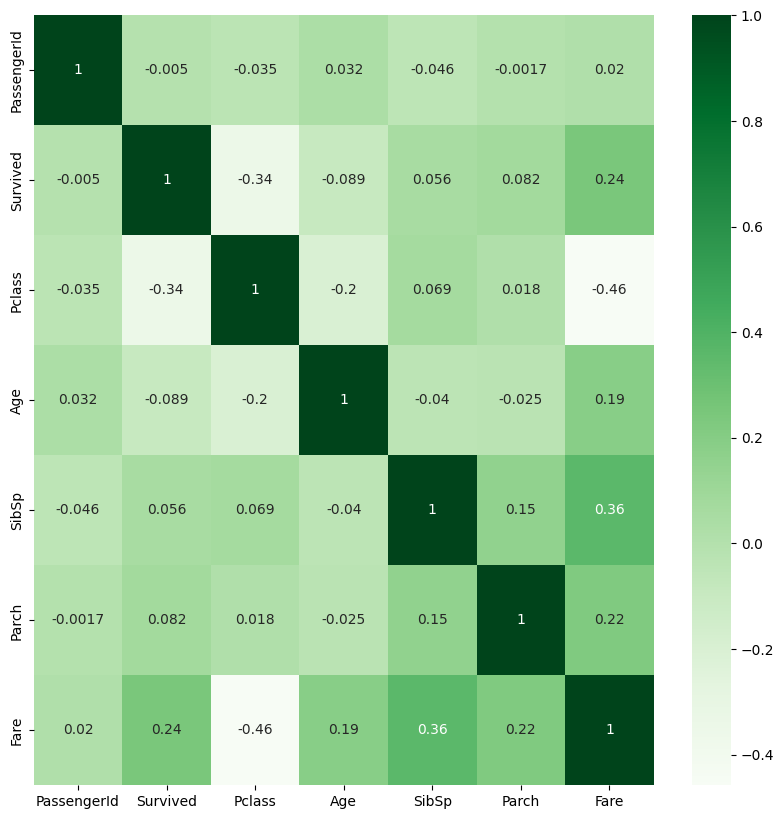

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(data[numerical_colimns].corr(),annot=True,cmap='Greens')
plt.show()

In [20]:
categorical_col = data.select_dtypes("object").columns
numerical_col = data.select_dtypes(np.number).columns

In [21]:
x = data.drop(columns=["Survived", "PassengerId", "Name"])
y = data["Survived"]

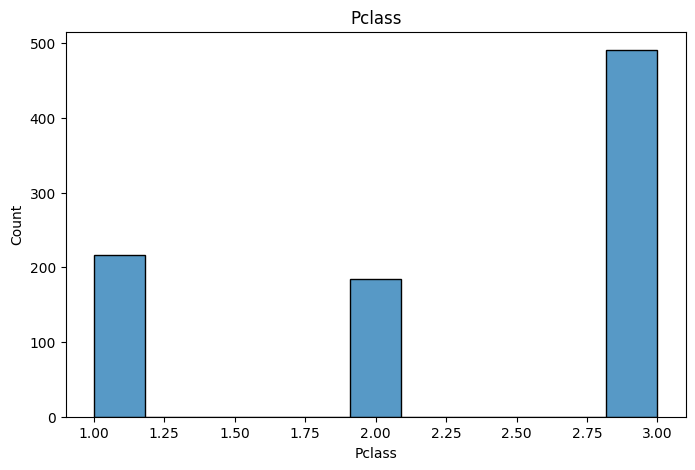

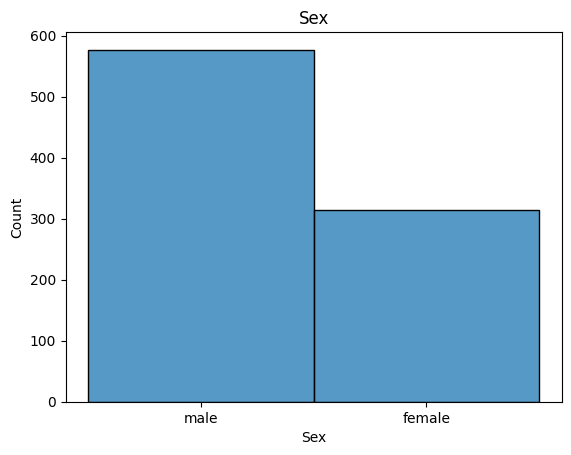

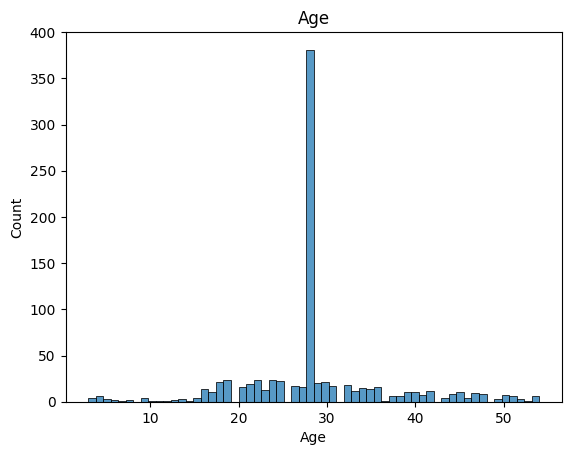

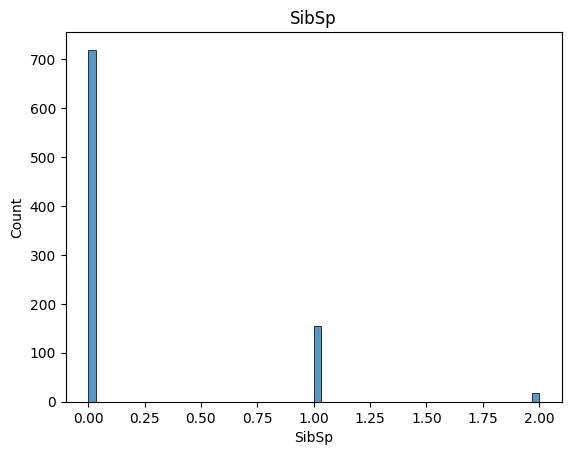

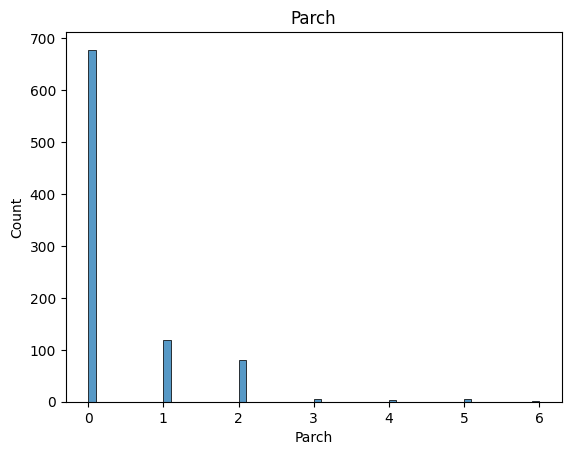

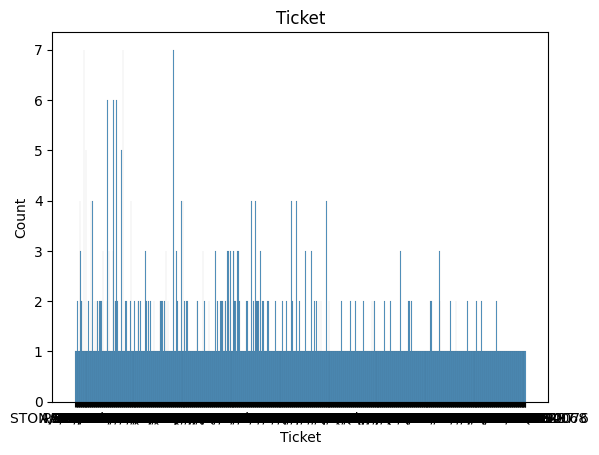

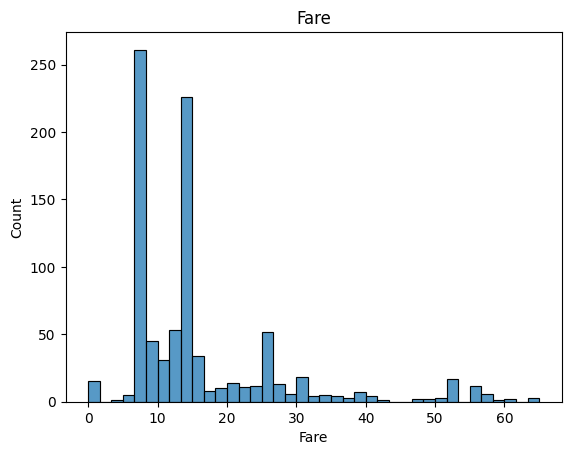

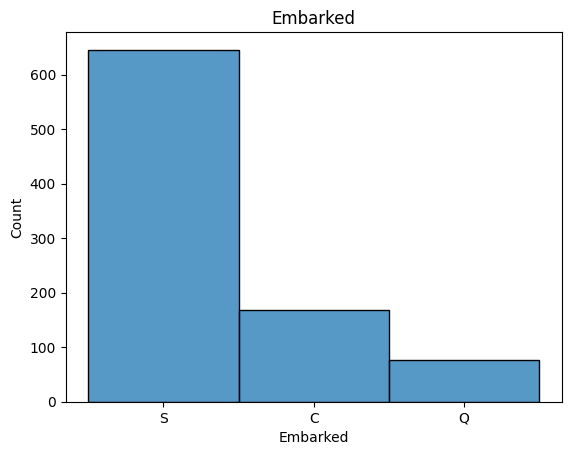

In [22]:
plt.figure(figsize=(8, 5))
for col in x.columns:
    sns.histplot(x[col])
    plt.title(col)
    plt.show()

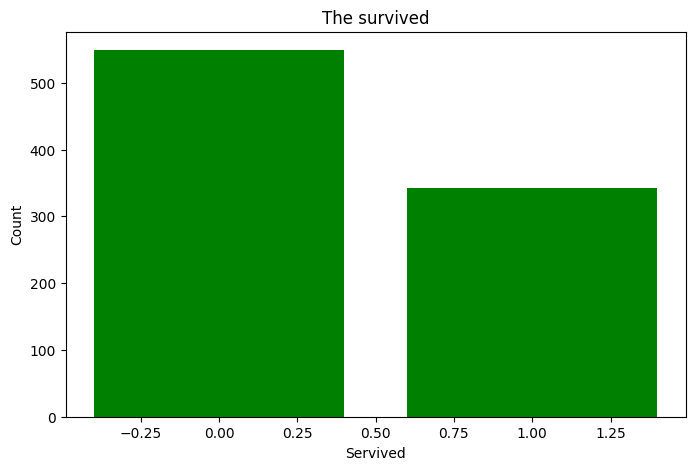

In [23]:
category, value = np.unique(y, return_counts=True)
plt.figure(figsize=(8, 5))
plt.bar(category, value, color= "green")
plt.title("The survived")
plt.xlabel("Servived")
plt.ylabel("Count")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
331,1,male,45.5,0.0,0,113043,28.5000,S
733,2,male,23.0,0.0,0,28425,13.0000,S
382,3,male,32.0,0.0,0,STON/O 2. 3101293,7.9250,S
704,3,male,26.0,1.0,0,350025,7.8542,S
813,3,female,28.0,0.0,2,347082,14.4542,S
...,...,...,...,...,...,...,...,...
106,3,female,21.0,0.0,0,343120,7.6500,S
270,1,male,28.0,0.0,0,113798,31.0000,S
860,3,male,41.0,2.0,0,350026,14.1083,S
435,1,female,28.0,0.0,2,113760,14.4542,S


In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in X_train.select_dtypes(include='object'):
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_col = x.select_dtypes(np.number).columns
X_train[num_col] = scaler.fit_transform(X_train[num_col]) 
X_test[num_col] = scaler.transform(X_test[num_col]) 

In [31]:
Y_train = encoder.fit_transform(Y_train)
Y_test = encoder.transform(Y_test)

In [32]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
331,-1.614136,1,1.994773,-0.461462,-0.479342,15,1.055895,2
733,-0.400551,1,-0.670025,-0.461462,-0.479342,188,-0.265416,2
382,0.813034,1,0.395894,-0.461462,-0.479342,543,-0.698039,2
704,0.813034,1,-0.314719,1.728944,-0.479342,332,-0.704075,2
813,0.813034,0,-0.077848,-0.461462,2.048742,277,-0.141452,2
...,...,...,...,...,...,...,...,...
106,0.813034,0,-0.906896,-0.461462,-0.479342,245,-0.721482,2
270,-1.614136,1,-0.077848,-0.461462,-0.479342,39,1.269010,2
860,0.813034,1,1.461813,3.919351,-0.479342,333,-0.170938,2
435,-1.614136,0,-0.077848,-0.461462,2.048742,27,-0.141452,2


In [33]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
709,0.813034,1,-0.077848,1.728944,0.784700,2661,-0.073971,0
439,-0.400551,1,0.277458,-0.461462,-0.479342,C.A. 18723,-0.478531,2
840,0.813034,1,-1.025332,-0.461462,-0.479342,SOTON/O2 3101287,-0.698039,2
720,-0.400551,0,-2.683429,-0.461462,0.784700,248727,1.439502,2
39,0.813034,0,-1.735945,1.728944,-0.479342,2651,-0.415304,0
...,...,...,...,...,...,...,...,...
433,0.813034,1,-1.380638,-0.461462,-0.479342,STON/O 2. 3101274,-0.766236,2
773,0.813034,1,-0.077848,-0.461462,-0.479342,2674,-0.757711,0
25,0.813034,0,1.106507,1.728944,5.840867,347077,1.302043,2
84,-0.400551,0,-1.380638,-0.461462,-0.479342,SO/C 14885,-0.478531,2
